In [3]:
!pip install pixellib

In [25]:
!pip install tensorflow==2.4.1

In [41]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pywt
from skimage.feature import hog
from skimage.transform import resize
import pixellib
from pixellib.tune_bg import alter_bg
import cv2
data_path="C:\\LOCAL DISK E\\DATA_SET"
files = os.listdir(data_path)
cat=[]
for name in files:
    cat+=[name]
fd_train=[]
for i in cat:
    path=os.path.join(data_path,i)
    print(i)
    for img in os.listdir(path):
        image=os.path.join(path,img)      
        train_data=cv2.imread(image)
        change_bg = alter_bg()
        change_bg.load_pascalvoc_model("C:\\LOCAL DISK E\\4 sem notes\\deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
        output = change_bg.color_bg(image, colors = (255, 255, 255))
        
        # HOG Implementation
        fd, hog_image = hog(output, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        fd_train +=[ np.append(fd,cat.index(i))]
        

np.savetxt('features_HOG_Limited_10.csv',fd_train, delimiter=',',fmt='%f')
        

airplanes
anchor
ant
butterfly
elephant
laptop
Leopards


C:\Users\prane\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: Mismatch between array dtype ('object') and format specifier ('%f')

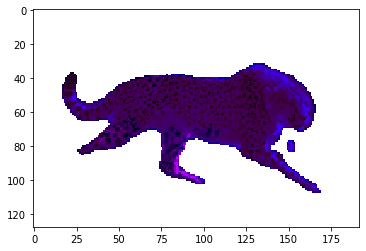

In [57]:
# sample
plt.imshow(output)

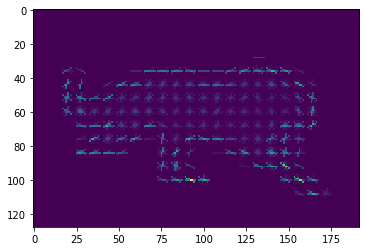

In [58]:
plt.imshow(hog_image)

# Sample for 1 i/p

In [34]:
image

'C:\\LOCAL DISK E\\DATA_SET\\airplanes\\image_0001.jpg'

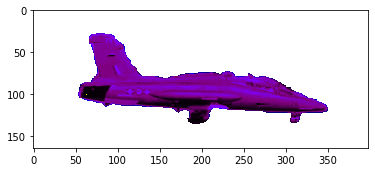

In [35]:
## trail for 
a=cv2.imread(image)
#plt.imshow(a)
import pixellib
from pixellib.tune_bg import alter_bg
import cv2
change_bg = alter_bg()
change_bg.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
output = change_bg.color_bg("C:\\LOCAL DISK E\\DATA_SET\\airplanes\\image_0001.jpg", colors = (255, 255, 255))
plt.imshow(output)

## classifiers 15 train and 85 test

In [ ]:
# load the training dataset
images = pd.read_csv('features_HOG_Limited_10.csv',header=None)
images

In [ ]:
x,y=images[range(756)].values,images[756].values

In [ ]:
from sklearn.model_selection import train_test_split

#Split data 15%-85% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=0)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 1

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

##  Predictions

In [ ]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, predictions))

# Classifier report

In [ ]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))